# **PROJECT STAGE - 1**

# 1. Introduction

## 1.1 Problem Formulation

A buyer takes into account several aspects of the house before making his decision to purchase the house. Dataset used in this notebook shows that house pricing has greater influence on house purchase rather than the amenities and number of rooms in the house. But the decision of buyers is indirectly related to other features as well as sales price is affected by these features. Researchers in Ames, Iowa need a handy information about the impact of various features of houses on the selling prices of houses in their city. This project aims at predicting prices of the houses in Ames, Iowa using regression techniques which will help determine factors affecting sales price of houses. 

## 1.2 Data Population

The data population for this problem comprises of houses in a specific city, Ames, Iowa. The dataset consists of 79 explanatory variables defining every aspect of residential homes in the city. The data was collected by Dean De Cock.

**Kaggle Account Name:**   Maham Rashid

# 2. Data Preparation

## 2.1 Loading Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
from scipy.stats import norm, skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline

## 2.2 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_ProjectStage2/

/content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_ProjectStage2


In [ ]:
from utils import fetch_and_cache

In [ ]:
#Displaying several lines from test.csv

test ='test.csv'
print(test, "======================")
with open(test, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

test.csv ======================
0 	 'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\n'
1 	 '1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg

In [ ]:
#Displaying several lines from train.csv

train ='train.csv'
print(train, "======================")
with open(train, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

train.csv ======================
0 	 'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n'
1 	 '1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable

Test and train datasets comprise of column variables describing features of houses for sale. The missing column in test dataset is 'Sale Price' which we will be predicting later on using ML Regression.

Now we will create dataFrames for train and test files which are in .csv format. After creating the dataframes, we will apply data wrangling techniques to understand structure, granularity, temporality, scope and faithfulness of the dataset.

## 2.3 Creating DataFrames

In [ ]:
#Creating Dataframes

df_test = pd.read_csv('test.csv')   
df_train = pd.read_csv('train.csv')

In [ ]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [ ]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

We see that our dataset comprises of many missing values which we will deal with later on. Let's first try to understand and visualize our data.

# 3. Data Wrangling

## 3.1 Structure

In this section, we will check the structure of training and test datasets individually.

In [ ]:
df_train_size = df_train.size
print ("Size of train dataframe is", df_train_size / 1e6, "MB")

Size of train dataframe is 0.11826 MB


In [ ]:
df_test_size = df_test.size
print ("Size of test dataframe is", df_test_size / 1e6, "MB")

Size of test dataframe is 0.11672 MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Column names in both, test.csv and train.csv, are shown below.

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Shapes/Sizes of both files are as follows:

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

Our dataset contains a combination of numerical and categorical features. Let's check how our data is divided into these two categories of features.

In [ ]:
numerical_vars = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
print('Number of numerical variables in train dataframe', len(numerical_vars))

Number of numerical variables in train dataframe 38


In [ ]:
numerical_vars = [feature for feature in df_test.columns if df_test[feature].dtypes != 'O']
print('Number of numerical variables in test dataframe', len(numerical_vars))

Number of numerical variables in test dataframe 37


In [ ]:
cat_vars = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
print('Number of categorical variables in train dataframe', len(cat_vars))

Number of categorical variables in train dataframe 43


In [ ]:
cat_vars = [feature for feature in df_test.columns if df_test[feature].dtypes == 'O']
print('Number of categorical variables in test dataframe', len(cat_vars))

Number of categorical variables in test dataframe 43


We have found the sizes and shapes of dataframes for test and train data. We have also listed the names of columns for better understanding of what the datasets look like. Now we can say that train and test datasets contain information about various features of houses. Train dataset comprises of 38 numerical variables and 43 string variables which explain features and prices of houses in Ames, Iowa. The dataframe is of size 1460, 81. Moreover, test dataset comprises of 37 numerical and 43 string variables. The missing column in test df is 'Sale Price' which we will be predicting later on using machine learning regression.

Now, we are going to use train dataset to visualize and understand the data by applying further data wrangling. 

In [ ]:
# Checking the description of training dataset
df_train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.2 Granularity 

To check for granularity of data, we need to see what each record represents. In our case, each record represents a house in Ames, Iowa. We see, from structure analysis of the data, that the data comprises of 79 features including numerical and categorical variables. Numeric variables tell us features about number of rooms and amenities, quality of houses etc. Some numeric variables represent temporal features of the house including years in which houses were built, sold and remodeled and when the garages were built in respective houses.The categorical features give information about materical used for construction, area of houses and different rooms and amenities etc.  Nomenclature of discrete numeric, temporal and categorical variables in shown below.

In [ ]:
year_variables = [x for x in numerical_vars if 'Year' in x or 'Yr' in x or 'Mo' in x]
print('Year variables:\n',year_variables)

Year variables:
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']


In [ ]:
discrete_variables = [x for x in numerical_vars if len(df_train[x].unique())<25 and x not in year_variables + ['Id']]
print('Discrete variables:\n',discrete_variables)

Discrete variables:
 ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal']


In [ ]:
continuous_vars = [x for x in numerical_vars if x not in discrete_variables + year_variables + ['Id']]
print('Categorical Variables:\n',continuous_vars)

Categorical Variables:
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


The number and categories of features show that granular aspects of houses have been covered in data collection. However, we saw in Structure section that some of the features are missing some values which reduces the granularity of data. We will deal with that later on while transforming data for modeling purposes. Now we can see the distribution of target feature 'Sale Price' and its relationship with all other features in the dataset.

In [ ]:
def miss_rows():
  return df_train.isnull().any(axis = 1).sum()

print('Missing rows in train data: ', miss_rows())

Missing rows in train data:  1460


In [ ]:
def miss_rows():
  return df_test.isnull().any(axis = 1).sum()

print('Missing rows in test data: ', miss_rows())

Missing rows in test data:  1459


Wee see that their is not even a single house which does not have a missing value for at least one feature. This reduces granularity of data. However, we will fill in the missing values for our analysis later in this notebook.

Now, we should analyze our target variable.

In [ ]:
print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


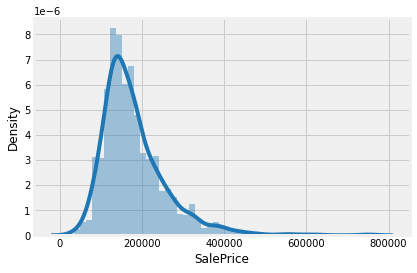

In [ ]:
# Visualizing distribution of sale price
# Interprets how sale price value is distributed over different value ranges
SalesPrice_Density = plt.figure()
sns.distplot(df_train.SalePrice, color = "tab:blue")
x = plt.show()

We see that the prices of houses under study are distributed over the range 34900 to 755000. 


Before we proceed with checking the granularity of our data, let's first see the pairwise correlation of the features in our data. Since our target variable is sales price, we will consider features with highest correlation for our data wrangling, EDA and modeling. 

In [ ]:
df_train['MSSubClass'].corr(df_train['SalePrice'])

-0.08428413512659531

In [ ]:
df_train['LotArea'].corr(df_train['SalePrice'])

0.2638433538714056

In [ ]:
df_train['OverallQual'].corr(df_train['SalePrice'])

0.7909816005838044

In [ ]:
df_train['OverallCond'].corr(df_train['SalePrice'])

-0.07785589404867803

In [ ]:
df_train['YearBuilt'].corr(df_train['SalePrice'])

0.5228973328794969

In [ ]:
df_train['YearRemodAdd'].corr(df_train['SalePrice'])

0.5071009671113865

In [ ]:
df_train['BsmtFinSF1'].corr(df_train['SalePrice'])

0.3864198062421532

In [ ]:
df_train['BsmtFinSF2'].corr(df_train['SalePrice'])

-0.011378121450215125

In [ ]:
df_train['BsmtUnfSF'].corr(df_train['SalePrice'])

0.21447910554696892

In [ ]:
df_train['TotalBsmtSF'].corr(df_train['SalePrice'])

0.6135805515591956

In [ ]:
df_train['1stFlrSF'].corr(df_train['SalePrice'])

0.6058521846919147

In [ ]:
df_train['2ndFlrSF'].corr(df_train['SalePrice'])

0.3193338028320681

In [ ]:
df_train['GrLivArea'].corr(df_train['SalePrice'])

0.7086244776126523

In [ ]:
df_train['TotRmsAbvGrd'].corr(df_train['SalePrice'])

0.5337231555820282

In [ ]:
df_train['GarageArea'].corr(df_train['SalePrice'])

0.6234314389183618

In [ ]:
df_train['WoodDeckSF'].corr(df_train['SalePrice'])

0.3244134445681294

In [ ]:
df_train['OpenPorchSF'].corr(df_train['SalePrice'])

0.3158562271160555

In [ ]:
df_train['EnclosedPorch'].corr(df_train['SalePrice'])

-0.12857795792595653

In [ ]:
df_train['3SsnPorch'].corr(df_train['SalePrice'])

0.04458366533574846

In [ ]:
df_train['MiscVal'].corr(df_train['SalePrice'])

-0.02118957964030325

In [ ]:
df_train['MoSold'].corr(df_train['SalePrice'])

0.046432245223819384

In [ ]:
df_train['YrSold'].corr(df_train['SalePrice'])

-0.028922585168730378

From pairwise correlation of some of our features, we see that most of the features have low correlation with sales price. In our analysis, we will only consider features which have correlation value higher than 0.60. Let's see which features have higher correlation with sales price.

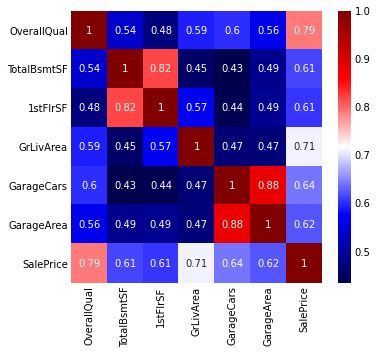

In [ ]:
correlation = df_train.corr()
highest_corr = correlation.index[abs(correlation['SalePrice'])>0.6]
plt.figure(figsize=(5,5))
highest_correlation_heatmap = sns.heatmap(df_train[highest_corr].corr(), annot=True, cmap="seismic")

In [ ]:
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

From the heatmap and the table above, we see that overall quality, ground living area, size of garage in car capacity, size of garage in square feet and total square feet of basement area are the features which have highest correlation with sales price. For our analysis and modeling, we will deal with these variables only.

Let's now see the relationship of sales price with features of our interest.

Text(0.5, 1.0, 'Trend of sale price with respect to quality.')

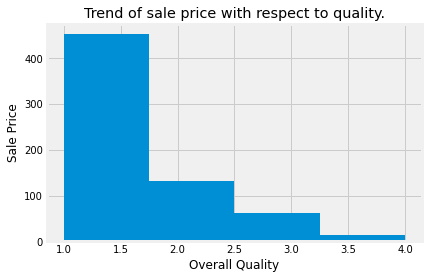

In [ ]:
data = df_train.groupby('SalePrice')['OverallQual'].nunique()
data.hist(bins=data.max())

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Trend of sale price with respect to quality.')

Let's zoom in to see how sale price eventually becomes significantly low for quality values above 1.75.

(0.0, 150.0)

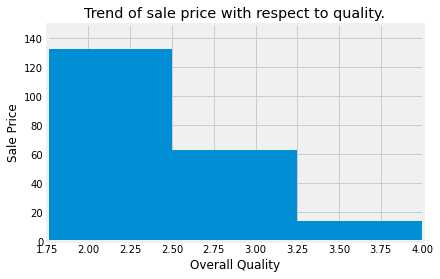

In [ ]:
data.hist(bins=data.max())

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Trend of sale price with respect to quality.')

plt.xlim(1.75, 4.0)
plt.ylim(0, 150)

Text(0.5, 1.0, 'Trend of sale price with respect to ground living area.')

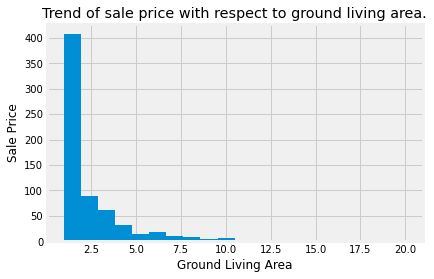

In [ ]:
data = df_train.groupby('SalePrice')['GrLivArea'].nunique()
data.hist(bins=data.max())

plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Trend of sale price with respect to ground living area.')

Let's zoom in to see how sale price eventually becomes significantly low for quality values above 2.

(0.0, 150.0)

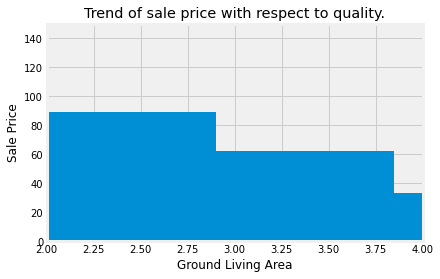

In [ ]:
data.hist(bins=data.max())

plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Trend of sale price with respect to quality.')

plt.xlim(2, 4.0)
plt.ylim(0, 150)

Now let's plot some scatter plots to see the relationship between these variables and other variables with correlation > 0.6.

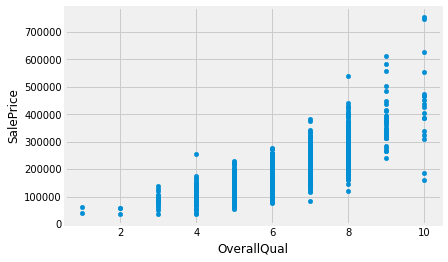

In [ ]:
ax1 = df_train.plot.scatter(x='OverallQual', y='SalePrice')

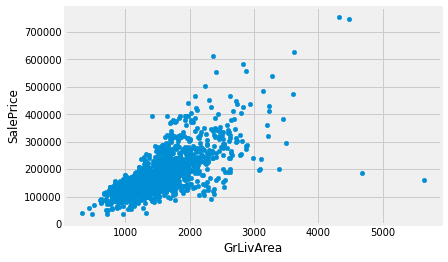

In [ ]:
ax1 = df_train.plot.scatter(x='GrLivArea', y='SalePrice')

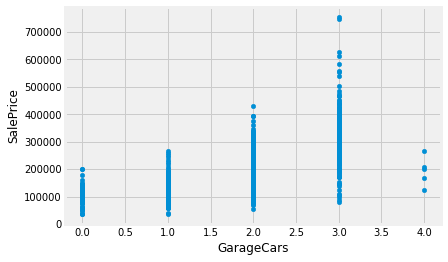

In [ ]:
ax1 = df_train.plot.scatter(x='GarageCars', y='SalePrice')

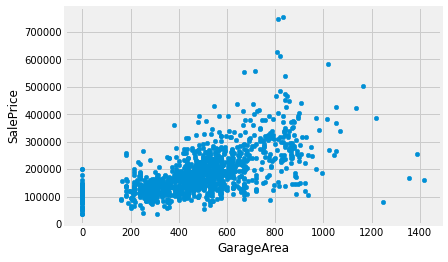

In [ ]:
ax1 = df_train.plot.scatter(x='GarageArea', y='SalePrice')

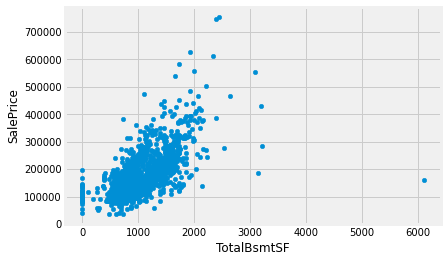

In [ ]:
ax1 = df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice')

Most of the plots show an almost rising trend in Sale Price with respect to other variables. We can view granular details by zooming into every plot or maybe draw histograms to see the trends in particular value ranges.

## 3.3 Temporality

The data contains variables explaining temporal features of the house. We extracted all temporal variables from dataset before. Let's see names of all temporal features again before analyzing them.

In [ ]:
print('Temporal features in data: ', year_variables)

Temporal features in data:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']


Now we can see distributions of all these variables to see temporality of data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


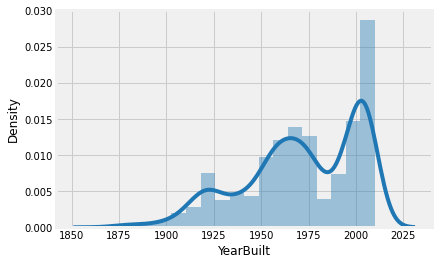

In [ ]:
# Visualizing distribution of YearBuilt
YearBuilt_Density = plt.figure()
sns.distplot(df_train.YearBuilt, color = "tab:blue")
x = plt.show()

In [ ]:
print(df_train['YearBuilt'].describe())

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


From above visualization, we see that the houses that were built from year 1872 till 2010 are sampled in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


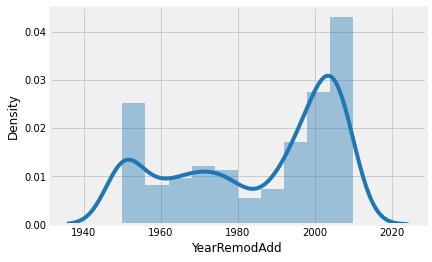

In [ ]:
# Visualizing distribution of YearRemodAdd
YearRemodAdd_Density = plt.figure()
sns.distplot(df_train.YearRemodAdd, color = "tab:blue")
x = plt.show()

In [ ]:
print(df_train['YearRemodAdd'].describe())

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


Now we know that the houses under study went through remodeling over the period of 60 years ranging from 1950 to 2010.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


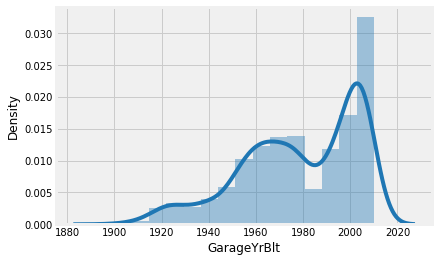

In [ ]:
# Visualizing distribution of GarageYrBlt
GarageYrBlt_Density = plt.figure()
sns.distplot(df_train.GarageYrBlt, color = "tab:blue")
x = plt.show()

In [ ]:
print(df_train['GarageYrBlt'].describe())

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


Garages were built in the houses from year 1900 till 2010.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


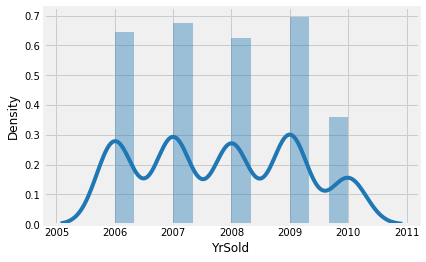

In [ ]:
# Visualizing distribution of YrSold
YrSold_Density = plt.figure()
sns.distplot(df_train.YrSold, color = "tab:blue")
x = plt.show()

In [ ]:
print(df_train['YrSold'].describe())

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


The graph shows that the years in which the houses were sold are scattered over the range 2006-2010. So the houses built from mid 1800s till 2010 were sold in just 4 years.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


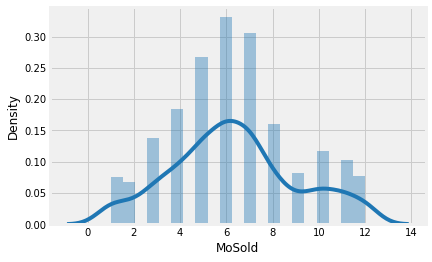

In [ ]:
# Visualizing distribution of MoSold
MoSold_Density = plt.figure()
sns.distplot(df_train.MoSold, color = "tab:blue")
x = plt.show()

In [ ]:
print(df_train['MoSold'].describe())

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


Visualization of the feature describing months in which houses were sold shows that that houses were sold in all 12 months. So houses got sold throughout the year from 2006 to 2010.

Now, we can see the relationship between these temporal variables and our target variable 'Sale Price'.

Text(0.5, 1.0, 'Sale Price vs.year in which the house was built')

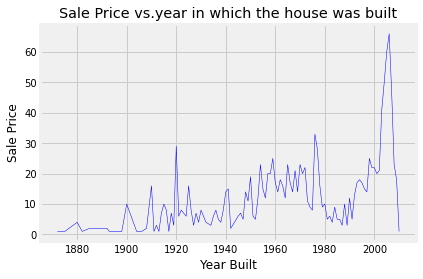

In [ ]:
df_train.groupby('YearBuilt')['SalePrice'].nunique().plot(color='blue', lw=0.5)
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Sale Price vs.year in which the house was built')

Text(0.5, 1.0, 'Sale Price vs.year in which the house was sold in')

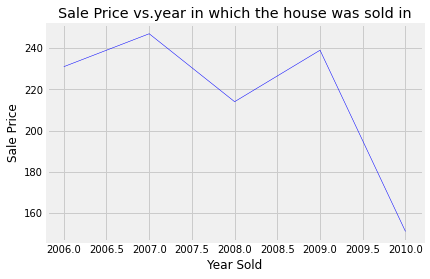

In [ ]:
df_train.groupby('YrSold')['SalePrice'].nunique().plot(color='blue', lw=0.5)
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('Sale Price vs.year in which the house was sold in')

Text(0.5, 1.0, 'Sale Price vs.year in which the house was remodeled')

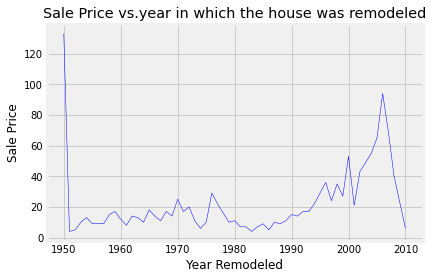

In [ ]:
df_train.groupby('YearRemodAdd')['SalePrice'].nunique().plot(color='blue', lw=0.5)
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price')
plt.title('Sale Price vs.year in which the house was remodeled')

Text(0.5, 1.0, 'Sale Price vs.month in which the houses were sold')

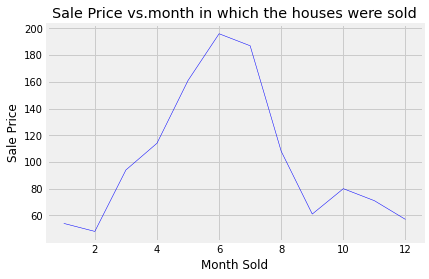

In [ ]:
df_train.groupby('MoSold')['SalePrice'].nunique().plot(color='blue', lw=0.5)
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.title('Sale Price vs.month in which the houses were sold')

Text(0.5, 1.0, 'Sale Price vs.year in which garages were built in the house')

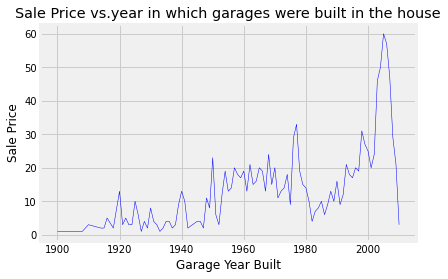

In [ ]:
df_train.groupby('GarageYrBlt')['SalePrice'].nunique().plot(color='blue', lw=0.5)
plt.xlabel('Garage Year Built')
plt.ylabel('Sale Price')
plt.title('Sale Price vs.year in which garages were built in the house')

In the above plots, we can see trends between 'Sale Price' and Years in which houses were built, sold, remodeled and garages were included in the houses respectively. 
We see that the graphs generally show an increasing trend in sale price with respect to corresponding variables except 'Year Sold'. The sale price, on the contrary, decreases as the year the house was sold in approaches recent past. We also notice that maximum sale price was in the middle of the year. So, buyers should have preferred buying houses either towards the beginning or the end of the year. 

## 3.4 Scope

We have already seen the distributions of some features in our analysis before. We can now fairly interpret that the data population comprises of 79 explanatory features of houses in Ames, Iowa. Houses in this study were built over the years from 1872 to 2000 and sold within last 4 years. Moreover, sale prices of the houses are distributed over the range 34900 to 755000. For our project, we are only studying the variables having highest correlation with sales price. Therefore, we will discuss scope of just those variables. We can visualize scope of overall quality, ground living area, garage capacity, garage area and total basement square feet of houses under study as follows.

In [ ]:
print(df_train['OverallQual'].describe())

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


In [ ]:
print(df_train['GrLivArea'].describe())

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


In [ ]:
print(df_train['GarageCars'].describe())

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


In [ ]:
print(df_train['GarageArea'].describe())

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


In [ ]:
print(df_train['TotalBsmtSF'].describe())

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


Overall quality and ground living area of houses under study are distributed over the range 0-2.3 and 5.8-8.6 respectively. The houses in the data population comprise of garage capacity for maximum 4 cars and garage area in the range 0 to 1418. So we can interpret that some of the houses do not have garages at all. Moreover, total area of basements of houses is in the range 0 to 6110 square feet.

Similarly, we can check for scope of other features in the dataset.

## 3.5 Faithfulness

Let's check if our data is faithful enough to rely upon!

In [ ]:
data = df_train
data1 = df_train

In [ ]:
# delete outliers
#df_train = df_train[df_train['OverallQual'] < 2]
#df_train = df_train[df_train['GrLivArea'] < 2900]
#df_train = df_train[df_train['TotalBsmtSF'] < 3000]
#df_train = df_train[df_train['1stFlrSF'] < 2500]
#df_train = df_train[df_train['BsmtFinSF1'] < 2000]

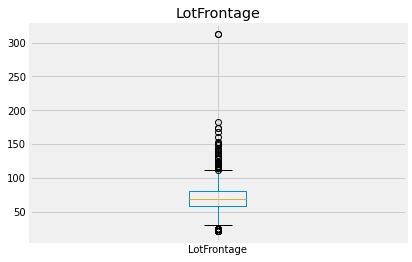

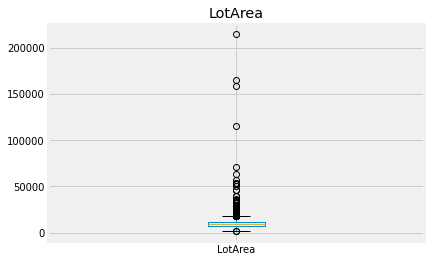

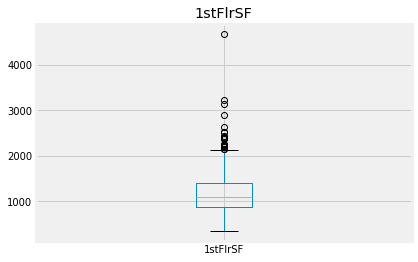

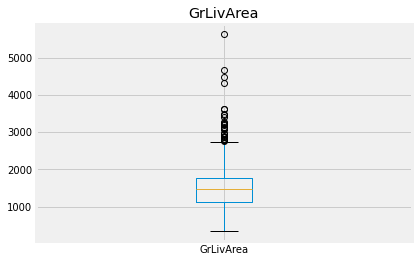

In [ ]:
for i in continuous_vars:
    if 0 in df_train[i].unique():
        pass
    else:
        #data[i] = (df_train[i])
        data.boxplot(column=i)
        plt.title(i)
        plt.show()

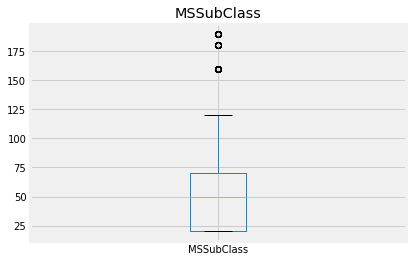

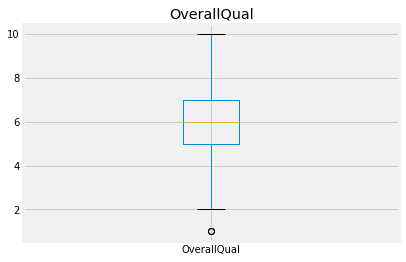

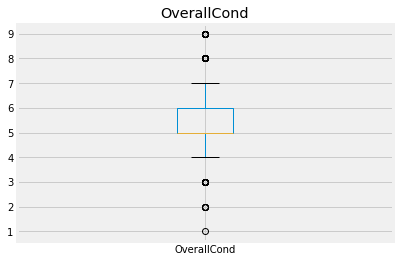

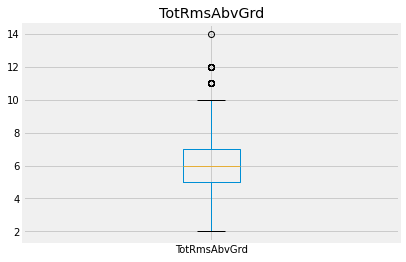

In [ ]:
for i in discrete_variables:
    if 0 in df_train[i].unique():
        pass
    else:
        data[i] = (df_train[i])
        data.boxplot(column=i)
        plt.title(i)
        plt.show()

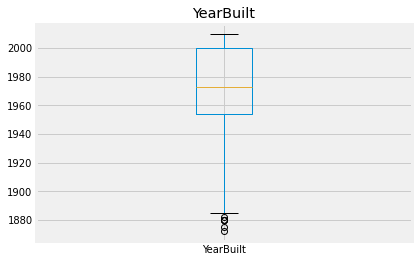

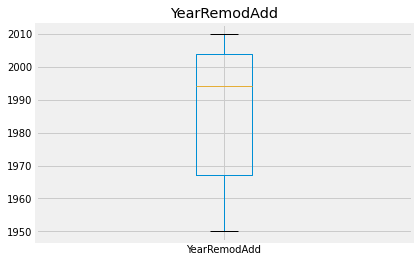

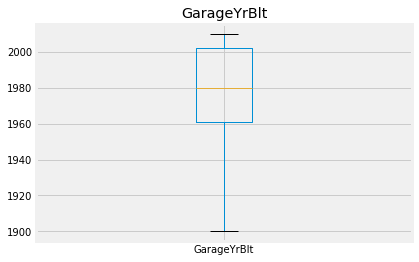

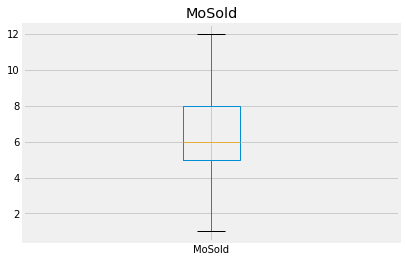

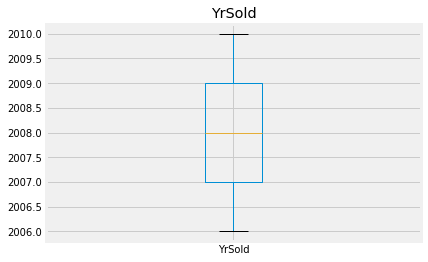

In [ ]:
for i in year_variables:
    if 0 in df_train[i].unique():
        pass
    else:
        #data[i] = (df_train[i])
        data.boxplot(column=i)
        plt.title(i)
        plt.show()

Above box plots show the existence of outliers in some features. It reveals that the dataset is not completely faithful as some variables have outliers which may or may not be incorrect or invalid entries. Or these outliers probably exist outside the range of variables.

#4. Comments

From what we have done so far, we see that the data obtained contains all possible features a house can present which are also those that a buyer would be interested in before making his decision to purchase the house that best meets his needs. The data
obtained is a small portion of the data population which comprises of all houses in Ames, Iowa. So, we can say that the data is not representative of our data population. However, it is a sample of our data population.

Visualizations show that the dataset does contain some outliers which could or could not be incorrect entries. Therefore, we might have to make the assumption of the data being completely faithful. Moreover, the data contains missing values, so we should fill in the missing values (which we will do in the section below) and assume those values to be correct. 

By looking at the dataset and comparing it with the data population, we can assume that the data was sampled using clustered sampling method. Cluster of houses was picked from the houses in Ames, Iowa followed by data sampling of houses in that cluster.

# **PROJECT STAGE-2**

# Modifications to Stage 1: 


*  Revised data population
*  Included discussion about features in granularity section
* Revised discussion about scope of data
* Revised discussion about temporality
* Altered code to generate correct box plots in faitfulness section
* Revised comments and sampling method





# 5. Data Transformation and Feature Engineering

This section covers the section 'Requirement 1.2' mentioned in project description document. In 'Granularity' section under Section 2.4, I performed a pairwise comparison of features with 'Sale Price' and extracted features with correlation value greater than 0.6 to be the features of interest for modeling. The features I have chosen for modeling are 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea' and 'TotalBsmtSF'. Furthermore, I will normalize features in the dataset to make sure that skews in features do not affect results of modeling.

From our EDA, we see that our data comprises of a target feature column 'SalePrice' in training data and 'Id' columns in test and train. We can remove this target column for modeling purposes. Furthermore, we do not need 'Id' columns at the moment. So we can remove these columns and make our data simple for modeling. I am going to do this by first concatenating the test and train datasets as it will make it easier to transform the data. Then, I can split the concatenated data back to test and train dataframes.

Let's first check for missing data again.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


We see that features in both test and train contain null values.

In [ ]:
y_train_for_final = df_train['SalePrice']
test_id = df_test['Id']

In [ ]:
data_for_final = pd.concat([df_train, df_test], axis=0, sort=False)
all_data = data_for_final.drop(['Id', 'SalePrice'], axis=1)
all_data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [ ]:
Total = all_data.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(Total, columns=['Total'])
missing_data.head(25)

,Total
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageYrBlt,159
GarageFinish,159


Features with more than 5 missing values are not much significant to us. We can filter them out.

In [ ]:
all_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
print(all_data.isnull().sum().max())

4


In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
total.head(19)

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
Utilities       2
Exterior1st     1
KitchenQual     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
Exterior2nd     1
SaleType        1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
Electrical      1
YearBuilt       0
ExterQual       0
RoofMatl        0
dtype: int64

In [ ]:
# filling the numeric data with value 0
numeric_missed = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)

In [ ]:
# filling missing categorical data with the value 0
categorical_missed = ['Exterior1st', 'Exterior2nd','SaleType','MSZoning', 'Electrical', 'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])

In [ ]:
#Filling missing values in Functional column with value 'Typ'
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [ ]:
# Commom value is not available for Utilities column
# Dropping the column 'Utilities'
all_data.drop(['Utilities'], axis=1, inplace=True)

In [ ]:
all_data.tail(30)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1429,30,RM,7030,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,6,1925,1950,Gable,CompShg,MetalSd,MetalSd,TA,TA,BrkTil,0.0,0.0,641.0,641.0,GasA,Gd,Y,SBrkr,641,0,0,641,0.0,0.0,1,0,2,1,Fa,4,Typ,0,1.0,272.0,N,184,0,70,0,0,0,0,3,2006,WD,Normal
1430,50,RM,9060,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,5,1957,1957,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,0.0,0.0,967.0,967.0,GasA,Gd,Y,SBrkr,967,671,0,1638,0.0,0.0,2,0,4,1,Gd,6,Typ,0,1.0,384.0,Y,0,21,0,0,0,0,0,4,2006,WD,Normal
1431,30,C (all),12366,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,Slab,0.0,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,0.0,0.0,N,0,0,23,0,0,0,0,10,2006,WD,Abnorml
1432,190,C (all),9000,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,5,6,1951,1951,Gable,CompShg,WdShing,Wd Shng,Fa,Fa,CBlock,0.0,0.0,660.0,660.0,GasA,TA,N,SBrkr,1060,336,0,1396,0.0,0.0,2,0,4,2,TA,8,Min2,0,0.0,0.0,Y,0,0,0,0,0,0,0,10,2006,WD,Abnorml
1433,50,C (all),8520,Grvl,Reg,Bnk,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,3,5,1916,1950,Gable,CompShg,MetalSd,MetalSd,TA,TA,PConc,0.0,0.0,216.0,216.0,GasA,Fa,N,SBrkr,576,360,0,936,0.0,0.0,1,0,2,1,TA,6,Typ,0,0.0,0.0,N,0,0,0,0,0,0,0,4,2006,WD,Normal
1434,120,RM,5748,Pave,IR1,HLS,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Gd,TA,PConc,1573.0,0.0,0.0,1573.0,GasA,Ex,Y,SBrkr,1778,0,0,1778,2.0,0.0,2,0,2,1,Ex,5,Typ,1,2.0,495.0,Y,123,53,0,0,153,0,0,2,2006,New,Partial
1435,120,RM,3842,Pave,IR1,HLS,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Gd,TA,PConc,1564.0,0.0,30.0,1594.0,GasA,Ex,Y,SBrkr,1646,0,0,1646,1.0,1.0,2,0,2,1,Gd,5,Typ,1,2.0,525.0,Y,128,53,0,0,155,0,0,12,2006,WD,Normal
1436,20,RL,23580,Pave,IR1,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,6,6,1979,1979,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,776.0,0.0,849.0,1625.0,GasA,TA,Y,SBrkr,1625,0,0,1625,0.0,1.0,2,0,3,1,Fa,6,Typ,1,2.0,576.0,Y,136,28,0,0,0,0,0,9,2006,WD,Normal
1437,90,RL,8385,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,6,5,1978,1978,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,0.0,0.0,1664.0,1664.0,GasA,TA,Y,SBrkr,1664,0,0,1664,0.0,0.0,2,0,4,2,TA,10,Typ,0,2.0,616.0,Y,0,0,0,0,0,0,0,10,2006,WD,Normal
1438,20,RL,9116,Pave,Reg,Lvl,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0.0,0.0,1491.0,1491.0,GasA,Ex,Y,SBrkr,1491,0,0,1491,0.0,0.0,2,0,3,1,Gd,7,Typ,0,2.0,490.0,Y,120,100,0,0,0,0,0,5,2006,WD,Normal


In [ ]:
all_data.shape

(2919, 60)

In [ ]:
all_data.isnull().sum().max() # checking if any missing values are left 

0

Now our data is transformed such that it does not contain any null values. 

## 5.1 Data Normalisation


Now, we need to normalize our data to scale our data in a specific range. Large values can affect our model greatly. This is why normalization is important.

We already checked the normal distribution of our target variable. Let's do it one more time to observe if our data fits properly over normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


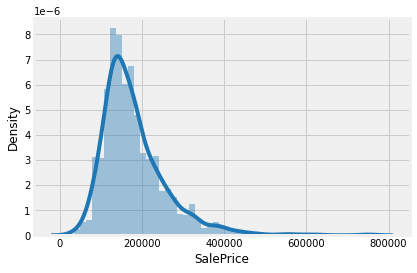

In [ ]:
# Visualizing density of sale price
# Interprets how sale price value is distributed over different value ranges
SalesPrice_Density = plt.figure()
sns.distplot(df_train.SalePrice, color = "tab:blue")
x = plt.show()

We observe positive skew in the data. Let's first fix this.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


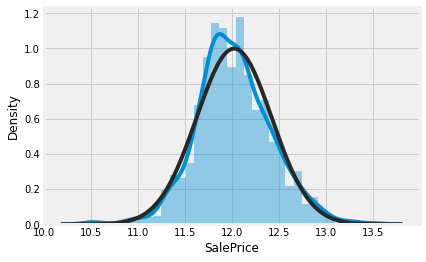

In [ ]:
y_train = np.log1p(df_train['SalePrice'])
sns.distplot(y_train, fit=norm);

We would also want to fix skewness in other features in our dataset.

In [ ]:
all_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706.0,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,2.0,548.0,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978.0,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,2.0,460.0,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486.0,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,2.0,608.0,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216.0,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,3.0,642.0,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655.0,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,3.0,836.0,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[discrete_variables].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skewed_feats[abs(skewed_feats)>0.5]
high_skew

MiscVal         21.947195
PoolArea        16.898328
LowQualFinSF    12.088761
3SsnPorch       11.376065
KitchenAbvGr     4.302254
BsmtHalfBath     3.931594
MSSubClass       1.375457
TotRmsAbvGrd     0.758367
Fireplaces       0.733495
HalfBath         0.694566
BsmtFullBath     0.624832
OverallCond      0.570312
dtype: float64

In [ ]:
for feature in high_skew.index:
    all_data[feature] = np.log1p(all_data[feature])

In [ ]:
all_data.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706.0,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0.0,1710,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,2.0,548.0,Y,0,61,0,0.000000,0,0.0,0.000000,2,2008,WD,Normal
1,3.044522,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978.0,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0.0,1262,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,2.0,460.0,Y,298,0,0,0.000000,0,0.0,0.000000,5,2007,WD,Normal
2,4.110874,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486.0,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0.0,1786,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,2.0,608.0,Y,0,42,0,0.000000,0,0.0,0.000000,9,2008,WD,Normal
3,4.262680,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216.0,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0.0,1717,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,3.0,642.0,Y,0,35,272,0.000000,0,0.0,0.000000,2,2006,WD,Abnorml
4,4.110874,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655.0,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0.0,2198,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,3.0,836.0,Y,192,84,0,0.000000,0,0.0,0.000000,12,2008,WD,Normal
5,3.931826,RL,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,1.791759,1993,1995,Gable,CompShg,VinylSd,VinylSd,TA,TA,Wood,732.0,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0.0,1362,0.693147,0.000000,1,0.693147,1,0.693147,TA,1.791759,Typ,0.000000,2.0,480.0,Y,40,30,0,5.771441,0,0.0,6.552508,10,2009,WD,Normal
6,3.044522,RL,10084,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,1.791759,2004,2005,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,1369.0,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0.0,1694,0.693147,0.000000,2,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,2.0,636.0,Y,255,57,0,0.000000,0,0.0,0.000000,8,2007,WD,Normal
7,4.110874,RL,10382,Pave,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,1.945910,1973,1973,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,859.0,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0.0,2090,0.693147,0.000000,2,0.693147,3,0.693147,TA,2.079442,Typ,1.098612,2.0,484.0,Y,235,204,228,0.000000,0,0.0,5.860786,11,2009,WD,Normal
8,3.931826,RM,6120,Pave,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,1.791759,1931,1950,Gable,CompShg,BrkFace,Wd Shng,TA,TA,BrkTil,0.0,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0.0,1774,0.000000,0.000000,2,0.000000,2,1.098612,TA,2.197225,Min1,1.098612,2.0,468.0,Y,90,0,205,0.000000,0,0.0,0.000000,4,2008,WD,Abnorml
9,5.252273,RL,7420,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,1.945910,1939,1950,Gable,CompShg,MetalSd,MetalSd,TA,TA,BrkTil,851.0,0.0,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,0.0,1077,0.693147,0.000000,1,0.000000,2,1.098612,TA,1.791759,Typ,1.098612,1.0,205.0,Y,0,4,0,0.000000,0,0.0,0.000000,1,2008,WD,Normal


Now, we want to convert categorical data to numeric data

In [ ]:
all_data = pd.get_dummies(all_data)
all_data.head(20)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,8450,7,1.791759,2003,2003,706.0,0.0,150.0,856.0,856,854,0.0,1710,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2.0,548.0,0,61,0,0.000000,0,0.0,0.000000,2,2008,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,9600,6,2.197225,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0.0,1262,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,2.0,460.0,298,0,0,0.000000,0,0.0,0.000000,5,2007,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,11250,7,1.791759,2001,2002,486.0,0.0,434.0,920.0,920,866,0.0,1786,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2.0,608.0,0,42,0,0.000000,0,0.0,0.000000,9,2008,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,9550,7,1.791759,1915,1970,216.0,0.0,540.0,756.0,961,756,0.0,1717,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,3.0,642.0,0,35,272,0.000000,0,0.0,0.000000,2,2006,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,14260,8,1.791759,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0.0,2198,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,3.0,836.0,192,84,0,0.000000,0,0.0,0.000000,12,2008,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,3.931826,14115,5,1.791759,1993,1995,732.0,0.0,64.0,796.0,796,566,0.0,1362,0.693147,0.000000,1,0.693147,1,0.693147,1.791759,0.000000,2.0,480.0,40,30,0,5.771441,0,0.0,6.552508,10,2009,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,3.044522,10084,8,1.791759,2004,2005,1369.0,0.0,317.0,1686.0,1694,0,0.0,1694,0.693147,0.000000,2,0.000000,3,0.693147,2.079442,0.693147,2.0,636.0,255,57,0,0.000000,0,0.0,0.000000,8,2007,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,4.110874,10382,7,1.945910,1973,1973,859.0,32.0,216.0,1107.0,1107,983,0.0,2090,0.693147,0.000000,2,0.693147,3,0.693147,2.079442,1.098612,2.0,484.0,235,204,228,0.000000,0,0.0,5.860786,11,2009,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,3.931826,6120,7,1.791759,1931,1950,0.0,0.0,952.0,952.0,1022,752,0.0,1774,0.000000,0.000000,2,0.000000,2,1.098612,2.197225,1.098612,2.0,468.0,90,0,205,0.000000,0,0.0,0.000000,4,2008,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,5.252273,7420,5,1.945910,1939,1950,851.0,0.0,140.0,991.0,1077,0,0.0,1077,0.693147,0.000000,1,0.000000,2,1.098612,1.791759,1.098612,1.0,205.0,0,4,0,0.000000,0,0.0,0.000000,1,2008,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
all_data.shape

(2919, 218)

In [ ]:
df_train.shape

(1460, 81)

While checking for faithfulness of our dataset, we noticed that some features contain outliers which can affect our model. However, we made an assumption that these outliers could be a part of the data so we had assumed our data to be faithful. If we had not made this assumption, we might have had to remove these outliers from features of our interest. 

## 5.2 Data Ready for Modeling

After data cleaning and preprocessing, we can now split our data back to train and test dataframes.

In [ ]:
X_train_ =all_data[:len(y_train)]
X_train_for_final = X_train_
X_test = all_data[len(y_train):]

# 6. ML Modeling

## 6.1 Choice of ML Model

**Multiple Linear Regression**

Multiple Linear Regression is a tool for statistical analysis of data which has more than one explanatory variables. The model fits a linear equation among the variables for data observation. It considers one variable to be the dependent variable and others to be explanatory variables. In our case, sales price is the dependent variable and all others are explanatory.

**Random Forest Regression**

Random forest regression creates several decision trees and produces output by evaluting mean prediction of the trees. It is known for its robustness to outliers and are more accurate than simple decision trees. They avoid overfitting data which is a common trait of decision trees.




Now that we have clean, normalized data, we are ready for some modeling to predict sale prices for houses in test data. We choose to apply linear and random forest regression techniques on our data because we showed in EDA that our data contains some linear trends. Moreover, we assumed that the data is completely faithful. So, we did not remove any outliers from our data, considering that those outliers are not due to measurement error and are actually a part of the dataset under study. So, we need a model that can cover up for the outliers even though we are assuming these outliers to be a part of data. Random Forest Regression is a model known for its robustness to outliers which is why we are going to apply it in our modeling. Moreover, random forests produce accurate results by merging the results from decision trees.  

## 6.2 How are chosen features related to Multiple Linear Regression?

During our EDA, we interpreted the relationship between Sale Price and other features in dataset and came up with the conclusion that many variables have a somewhat linear trend with selling price. Multiple linear regression is suitable for data with more than one explanatory variables and whose variables have somewhat linear relationship with the target variable. This is why we chose linear regression based on the quality of features we have in our dataset.

## 6.3 How are chosen features related to Random Forest Regression?

We saw that some features contain outliers. However, we assumed that those values are not a measurement error but a valid part of the dataset. However, we need to be sure that the model that we choose is robust to outliers to avoid any adverse effect of outliers on our results. Random Forest Regression is known for its robustness to outliers which is why we have chosen this model.

## 6.4 Loss Function

The loss function for multiple linear regression and random forest regression is mean square error. 
The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. The lower the MSE, the better the forecast. (Source: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/)

Random Forest Regressor is flexible to loss function customization. However, we will build it using its default loss function MSE for the sake of this project.

#6.5 Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

###6.5.1 Splitting data into test and train

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_, y_train, train_size=0.8, test_size=0.2, random_state=1)

In [ ]:
X_test.shape , X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1459, 218), (1168, 218), (292, 218), (1168,), (292,))

### 6.5.2 Multiple Linear Regression

In [ ]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred = linear_model.predict(X_train)
abs = mean_absolute_error(y_train, y_train_pred)
print('Mean Absolute Error: ', abs)

Mean Absolute Error:  0.06598232060620522


In [ ]:
linear_score = linear_model.score(X_train, y_train)
print('Multiple Linear Regression Accuracy: ', linear_score * 100, '%')

Multiple Linear Regression Accuracy:  94.2546831010571 %


##6.5.3 Random Forest Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, r2_score
from sklearn.ensemble import RandomForestRegressor

def calculate_score(y, theta):
  return r2_score(y, theta)

cv_ = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
estimator = RandomForestRegressor()
scoring_ = make_scorer(calculate_score)
param_ = { 
        "n_estimators"      : [10,20,30],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }


grid = GridSearchCV(estimator, param_, scoring=scoring_, cv=cv_)
grid.fit(X_train, y_train)
model = grid.best_estimator_

In [ ]:
model

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.fit(X_train, y_train)
u = model.predict(X_test)
score = model.score(X_train, y_train)
print('Random Forest Regressor Accuracy: ' + str(score * 100) + '%')

Random Forest Regressor Accuracy: 99.6145613547668%


## 6.5.4 Generating Output for Submission

We choose to use random forest regressor as final model due to its high accuracy and its robustness to outliers.

In [ ]:
final_pred=model.predict(X_test)

In [ ]:
submit=pd.DataFrame()
submit['Id']= test_id
submit['SalePrice']=np.exp(final_pred)
submit.to_csv('mySubmission_HousePrice.csv',index=False)
submit

,Id,SalePrice
0,1461,120794.405060
1,1462,152238.990224
2,1463,185152.150291
3,1464,192023.294686
4,1465,187560.477342
...,...,...
1454,2915,80470.533188
1455,2916,80616.717568
1456,2917,161401.804050
1457,2918,124052.249407


# Kaggle Leaderboard Score

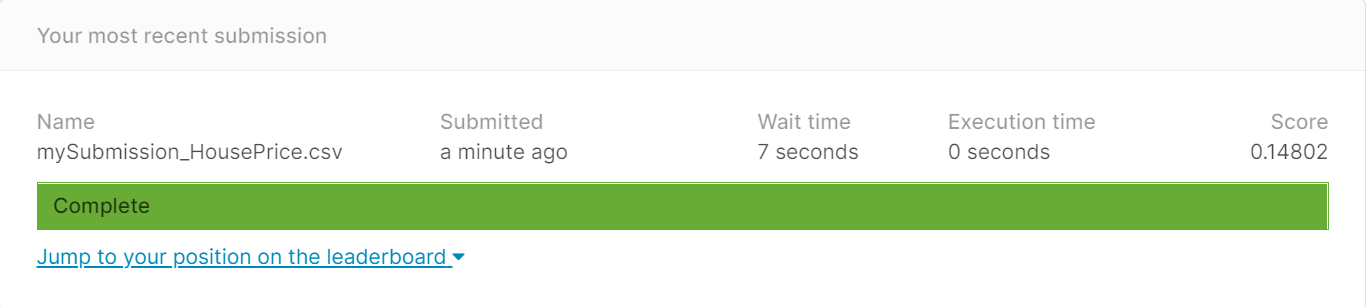

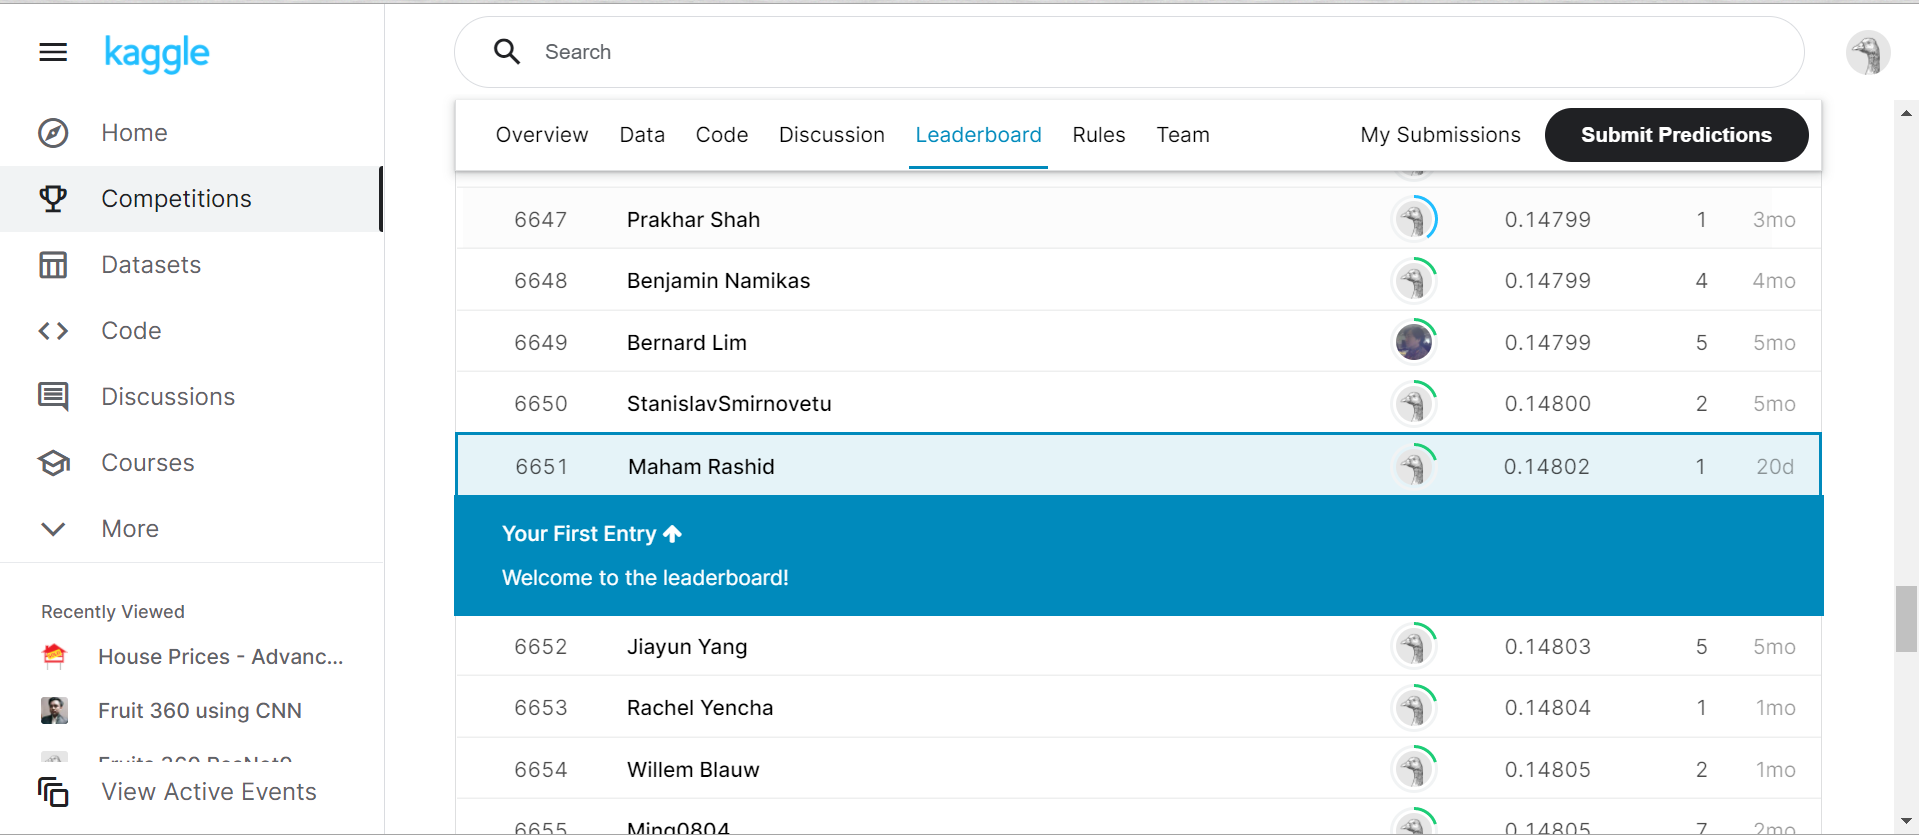

# **PROJECT STAGE - FINAL**

# Modifications to Stage 2

*   Definition of granularity improved: Granularity is what each record represents and in our case, each record represents a house in Ames, Iowa. 
*   Loss Function: Loss function for Multiple Linear Regression and RF Regression is MSE. Please see the changes in Loss Function section.
*   Screenshot for Kaggle Leaderboard score for stage 2 included in the notebook



# 7. Model Evaluation
## 7.1 Choice of Evaluation Metric
The evaluation metric for our solution is (root) mean squared error for random forest regression and linear regression. 

## 7.2 K-Fold Test-Train Split 

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

def compute_CV_scores(modelA, modelB, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_error_A = []
    validation_error_B = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the modelA on the training split
        modelA.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        Y_valid_predA = modelA.predict(split_X_valid)
        errorA = mean_squared_error(split_Y_valid, Y_valid_predA)
        errorA = np.sqrt(errorA)
        validation_error_A.append(errorA)
        
        # Fit the modelB on the training split
        modelB.fit(split_X_train, split_Y_train) 
        
        # Compute the RMSE on the validation split
        Y_valid_predB = modelB.predict(split_X_valid)
        errorB = mean_squared_error(split_Y_valid, Y_valid_predB)
        errorB = np.sqrt(errorB)
        validation_error_B.append(errorB)
        
    return validation_error_A, np.mean(validation_error_A), validation_error_B, np.mean(validation_error_B)

In [ ]:
X = X_train_for_final
#X_train_ = data_for_final.drop('SalePrice', axis=1).values
y = df_train['SalePrice'].values
errorA, meanA, errorB, meanB = compute_CV_scores(linear_model, model, X, y)
print('Error A: ',errorA)
print('Error B: ', errorB)
print('Mean A', meanA)
print('Mean B', meanB)

Error A:  [27641.208671975914, 34476.310437989385, 37793.089497818044, 26537.31603334396, 47068.119322291896]
Error B:  [25284.111020880868, 32662.05314364545, 33184.06634649626, 24005.329297889057, 32726.829084401]
Mean A 34703.20879268384
Mean B 29572.477778662527


We see that mean RMSE for linear regression model is slightly higher than random forest regression. 

## 7.3 Evaluation of Models Performance

In [ ]:
from scipy import stats
stats.ttest_ind(errorA, errorB)

Ttest_indResult(statistic=1.2077061129440594, pvalue=0.2616496725953118)

Based on the t-test, we conclude that both, multiple linear regression and random forest regression models perform the same as the p-value is in the range [0.05,0.95] (null hypothesis is verified). However, if we ignore the loss of significance, we approve of random forest regression model. Therefore, I have made my submission to Kaggle using prediction from RF regression model.

Random Forest regression is robust to outliers which might be present in the data. Also, the plots we drew during structural analysis of data revealed that some of the features almost linearly relate to the target variable. However, all the features do not hold this linear relationship with target variable. These anomalies in the trend could be one possible reason why linear regression performs poorly compared to random forest regression.

## 7.4 Generating Output for Submission

In [ ]:
final_pred=model.predict(X_test)

In [ ]:
submit1=pd.DataFrame()
submit1['Id']= test_id
submit1['SalePrice']=final_pred
submit1.to_csv('mySubmission_HousePrice.csv',index=False)
submit1

"submit1=pd.DataFrame()\nsubmit1['Id']= test_id\nsubmit1['SalePrice']=final_pred\nsubmit1.to_csv('mySubmission_HousePrice.csv',index=False)\nsubmit1"

# Kaggle Leaderboard Score - Final Submission

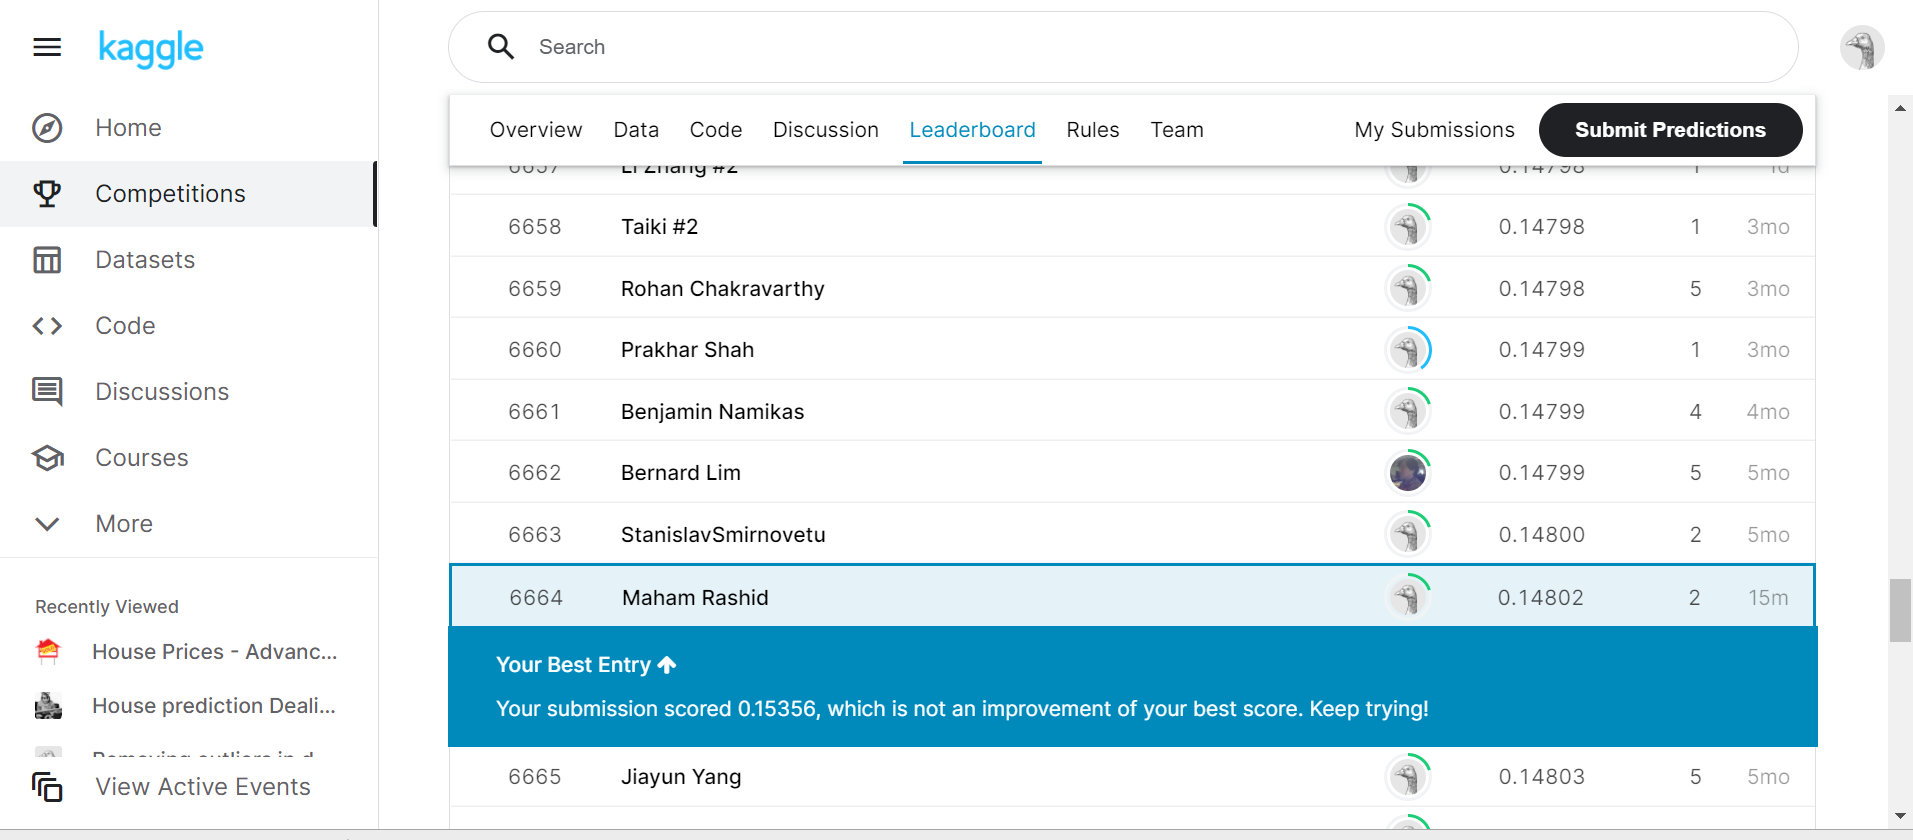

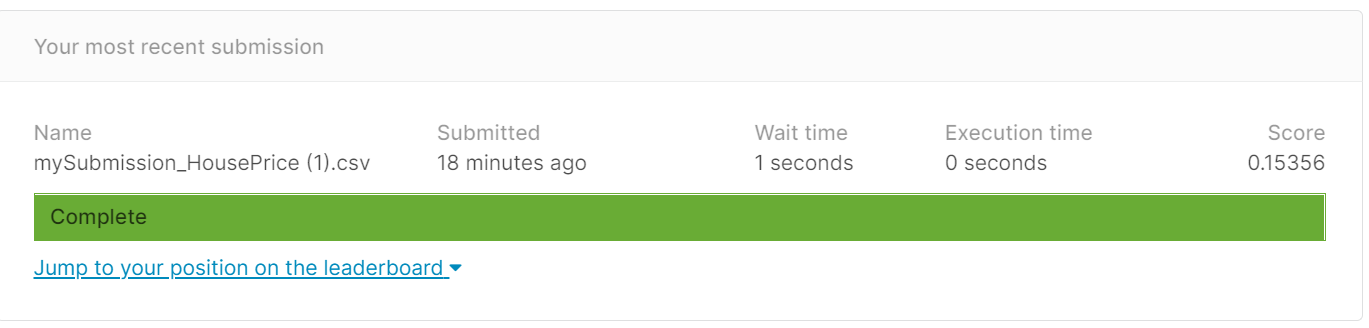

# Conclusion
The input data set comprised of 1460 records where each record represents a house in Ames, Iowa. We applied regression techniques to determine the sales prices for various houses in the test data set. In this project, we have determined the prices of houses based on various features available for all houses under study. First, we analyzed the data using EDA and determined the existence of missing data, skewness and potential outliers. We filled in the missing data, fixed skews and found out no improvement in the result by removing outliers. Therefore, I have left outliers untouched, assuming that the outliers are infact a part of the data. We tested two models, multiple linear regression and random forest regression, using single and k-fold test train split and compared the performance of both using t-test. The t-test shows that random forest regression performs better than linear regression based on p-value which is approx 0.2. Random forest regression is robust to outliers which might be there in the data as I have not dealt with outliers during data pre-processing. The data is not quite linear which is why linear regression does not perform exactly as well as RF regression. However, both the models perform almost the same which we can deduce from the ttest which verifies the null hypothesis.

# Learnings
In this project, I have learned data processing techniques, implementation of all steps of data analysis and model evaluation based on performance comparison. The project helped learn everything we studied in class from a practical perspective.

# References

* https://www.kaggle.com/riderlord/eda-house-prices-advanced
* https://www.kaggle.com/auishikpyne/house-prices-prediction-top-10
* https://www.kaggle.com/hijest/xgbregressor-on-housing-dataset
